In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() 

import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('WHR2018Chapter2OnlineData.xls')
# Summary of variables and types
print(data.info())
print(data.describe(), sep = '\n')
# Quick preview of dataframe
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null fl

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540
5,Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
6,Afghanistan,2014,3.130896,7.484583,0.525568,51.370525,0.508514,0.118579,0.871242,0.531691,0.374861,0.409048,-1.773257,-1.312503,1.395396,0.445686,NaN,NaN,0.413974
7,Afghanistan,2015,3.982855,7.466215,0.528597,51.693527,0.388928,0.094686,0.880638,0.553553,0.339276,0.260557,-1.844364,-1.291594,2.160618,0.542480,NaN,NaN,0.596918
8,Afghanistan,2016,4.220169,7.461401,0.559072,52.016529,0.522566,0.057072,0.793246,0.564953,0.348332,0.324990,-1.917693,-1.432548,1.796219,0.425627,NaN,NaN,0.418629
9,Afghanistan,2017,2.661718,7.460144,0.490880,52.339527,0.427011,-0.106340,0.954393,0.496349,0.371326,0.261179,NaN,NaN,1.454051,0.546283,NaN,NaN,0.286599


In [3]:
# Trimming the dataset for years 2013-2017 for analysis
list = []
for i in range(2013, 2018):
    df = data[data['year'] == i]
    list.append(df)
print(len(list))
data2w = pd.concat(list)
data2 = data2w.set_index('country')
type(data2)
print(data2.shape)
data2.head()

5
(708, 18)


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
country,,,,,,,,,,,,,,,,,,
Afghanistan,2013,3.572100,7.503376,0.483552,51.042980,0.577955,0.074735,0.823204,0.620585,0.273328,0.482847,-1.879709,-1.403036,1.223690,0.342569,NaN,NaN,0.304368
Albania,2013,4.550648,9.258439,0.759477,68.291374,0.631830,-0.132977,0.862905,0.633609,0.338379,0.338095,0.070411,-0.330956,2.315580,0.508846,NaN,0.303250,0.633796
Angola,2013,3.937107,8.729884,0.721591,52.042301,0.409555,-0.093647,0.816375,0.658284,0.370875,0.547732,-0.752538,-1.213750,2.325728,0.590720,NaN,0.427000,0.588065
Argentina,2013,6.582260,9.877256,0.909874,66.977570,0.737250,-0.130664,0.822900,0.842479,0.254205,0.433749,0.171151,-0.593692,1.992898,0.302768,0.423,0.476067,0.362593
Armenia,2013,4.277191,8.952597,0.723260,64.455490,0.504082,-0.183379,0.899797,0.562174,0.449950,0.260400,-0.238823,-0.138635,2.126446,0.497160,0.315,0.325067,0.457182


In [4]:
# Check for NaN values
check_na = pd.DataFrame(data2.isna().sum()).transpose()
check_na.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,0,0,20,5,4,14,30,49,8,5,62,153,153,0,0,553,82,6


In [5]:
data_mean = data2.groupby('country').mean()
# Checking properties of data_mean
print(data_mean.shape)
print(data_mean.index.nunique())
data_mean.head()

(156, 18)
156


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
country,,,,,,,,,,,,,,,,,,
Afghanistan,2015.000000,3.513547,7.475144,0.517534,51.692618,0.484995,0.047746,0.864544,0.553426,0.341425,0.347724,-1.853756,-1.359920,1.605995,0.460529,NaN,NaN,0.404098
Albania,2015.000000,4.624342,9.310212,0.660106,68.683780,0.709952,-0.061766,0.881522,0.670275,0.335788,0.440501,0.211342,-0.202517,2.606685,0.563729,NaN,0.303250,0.460134
Algeria,2015.666667,5.648221,9.530207,0.791177,65.446287,0.436670,-0.194670,0.699774,0.642798,0.280896,NaN,-1.005564,-0.798866,1.928926,0.347137,NaN,0.276000,0.535888
Angola,2013.500000,3.865972,8.735920,0.738103,52.251505,0.392048,-0.125765,0.825226,0.618400,0.369370,0.560039,-0.745951,-1.191144,2.261220,0.584794,NaN,0.427000,0.514382
Argentina,2015.000000,6.483411,9.848945,0.908751,67.258247,0.808640,-0.169551,0.843995,0.841895,0.280167,0.389174,0.233972,-0.518252,2.122436,0.328708,0.425,0.476067,0.349038


In [6]:
# Replacing the NaN values with the mean values
for i in range(708):
    for j in range(18):
         if np.isnan(data2.iloc[i,j]):
            name = data2.iloc[i,0:j].name
            data2.iloc[i,j] = data_mean.loc[name].iloc[j]

In [7]:
check_na2 = pd.DataFrame(data2.isna().sum()).transpose()
check_na2.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,0,0,14,1,4,1,15,31,1,1,46,15,15,0,0,310,82,0


In [8]:
score = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name = 'Figure2.2')
happydf = score[['Country', 'Happiness score']]
happydf.columns = ['country', 'Happiness score']
happydf = happydf.set_index('country')
happydf = happydf.dropna()

In [9]:
cleandata = data2.merge(happydf, on = 'country')
cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, Afghanistan to Laos
Data columns (total 19 columns):
year                                                        699 non-null int64
Life Ladder                                                 699 non-null float64
Log GDP per capita                                          689 non-null float64
Social support                                              698 non-null float64
Healthy life expectancy at birth                            699 non-null float64
Freedom to make life choices                                698 non-null float64
Generosity                                                  688 non-null float64
Perceptions of corruption                                   668 non-null float64
Positive affect                                             698 non-null float64
Negative affect                                             698 non-null float64
Confidence in national government                           653 non-null float64


### Exploratory Analysis

In [10]:
happy_workdf = cleandata.copy()
print(happy_workdf.info())
happy_workdf.corr()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, Afghanistan to Laos
Data columns (total 19 columns):
year                                                        699 non-null int64
Life Ladder                                                 699 non-null float64
Log GDP per capita                                          689 non-null float64
Social support                                              698 non-null float64
Healthy life expectancy at birth                            699 non-null float64
Freedom to make life choices                                698 non-null float64
Generosity                                                  688 non-null float64
Perceptions of corruption                                   668 non-null float64
Positive affect                                             698 non-null float64
Negative affect                                             698 non-null float64
Confidence in national government                           653 non-null float64


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year",Happiness score
year,1.000000,0.024317,0.008588,0.005439,0.029656,0.133343,-0.030556,-0.029722,-0.025688,0.095589,0.052561,0.002213,-0.000314,0.154680,0.087913,-0.021628,-0.010009,0.053955,-0.001135
Life Ladder,0.024317,1.000000,0.793321,0.718962,0.767238,0.517577,0.177063,-0.420525,0.541305,-0.384841,-0.133687,0.621383,0.719823,-0.322682,-0.815547,-0.148217,-0.217509,-0.382500,0.957836
Log GDP per capita,0.008588,0.793321,1.000000,0.683548,0.855788,0.350237,0.000886,-0.348480,0.333558,-0.294518,-0.210994,0.625795,0.770214,-0.323484,-0.686514,-0.341480,-0.322183,-0.435347,0.811188
Social support,0.005439,0.718962,0.683548,1.000000,0.634784,0.396176,0.090001,-0.235430,0.465629,-0.489009,-0.146776,0.550323,0.574012,-0.353395,-0.677163,-0.252941,-0.166662,-0.410241,0.733869
Healthy life expectancy at birth,0.029656,0.767238,0.855788,0.634784,1.000000,0.319953,0.035502,-0.284639,0.324635,-0.309104,-0.257024,0.641488,0.751121,-0.347644,-0.688428,-0.328524,-0.376263,-0.514756,0.779008
Freedom to make life choices,0.133343,0.517577,0.350237,0.396176,0.319953,1.000000,0.336718,-0.489399,0.623966,-0.324808,0.450071,0.425145,0.461440,-0.126938,-0.378036,0.139900,0.091905,0.042032,0.522207
Generosity,-0.030556,0.177063,0.000886,0.090001,0.035502,0.336718,1.000000,-0.311370,0.309613,-0.098351,0.353714,0.104350,0.172197,-0.168941,-0.150175,-0.113169,-0.099598,0.126391,0.169836
Perceptions of corruption,-0.029722,-0.420525,-0.348480,-0.235430,-0.284639,-0.489399,-0.311370,1.000000,-0.337626,0.320304,-0.455666,-0.304121,-0.500019,0.375452,0.385106,0.143275,0.198639,-0.001353,-0.418642
Positive affect,-0.025688,0.541305,0.333558,0.465629,0.324635,0.623966,0.309613,-0.337626,1.000000,-0.420544,0.169512,0.407007,0.389077,-0.149705,-0.425218,0.287660,0.261305,0.016812,0.529126
Negative affect,0.095589,-0.384841,-0.294518,-0.489009,-0.309104,-0.324808,-0.098351,0.320304,-0.420544,1.000000,-0.109811,-0.326711,-0.386267,0.561732,0.585200,0.318534,0.183087,0.308681,-0.374490


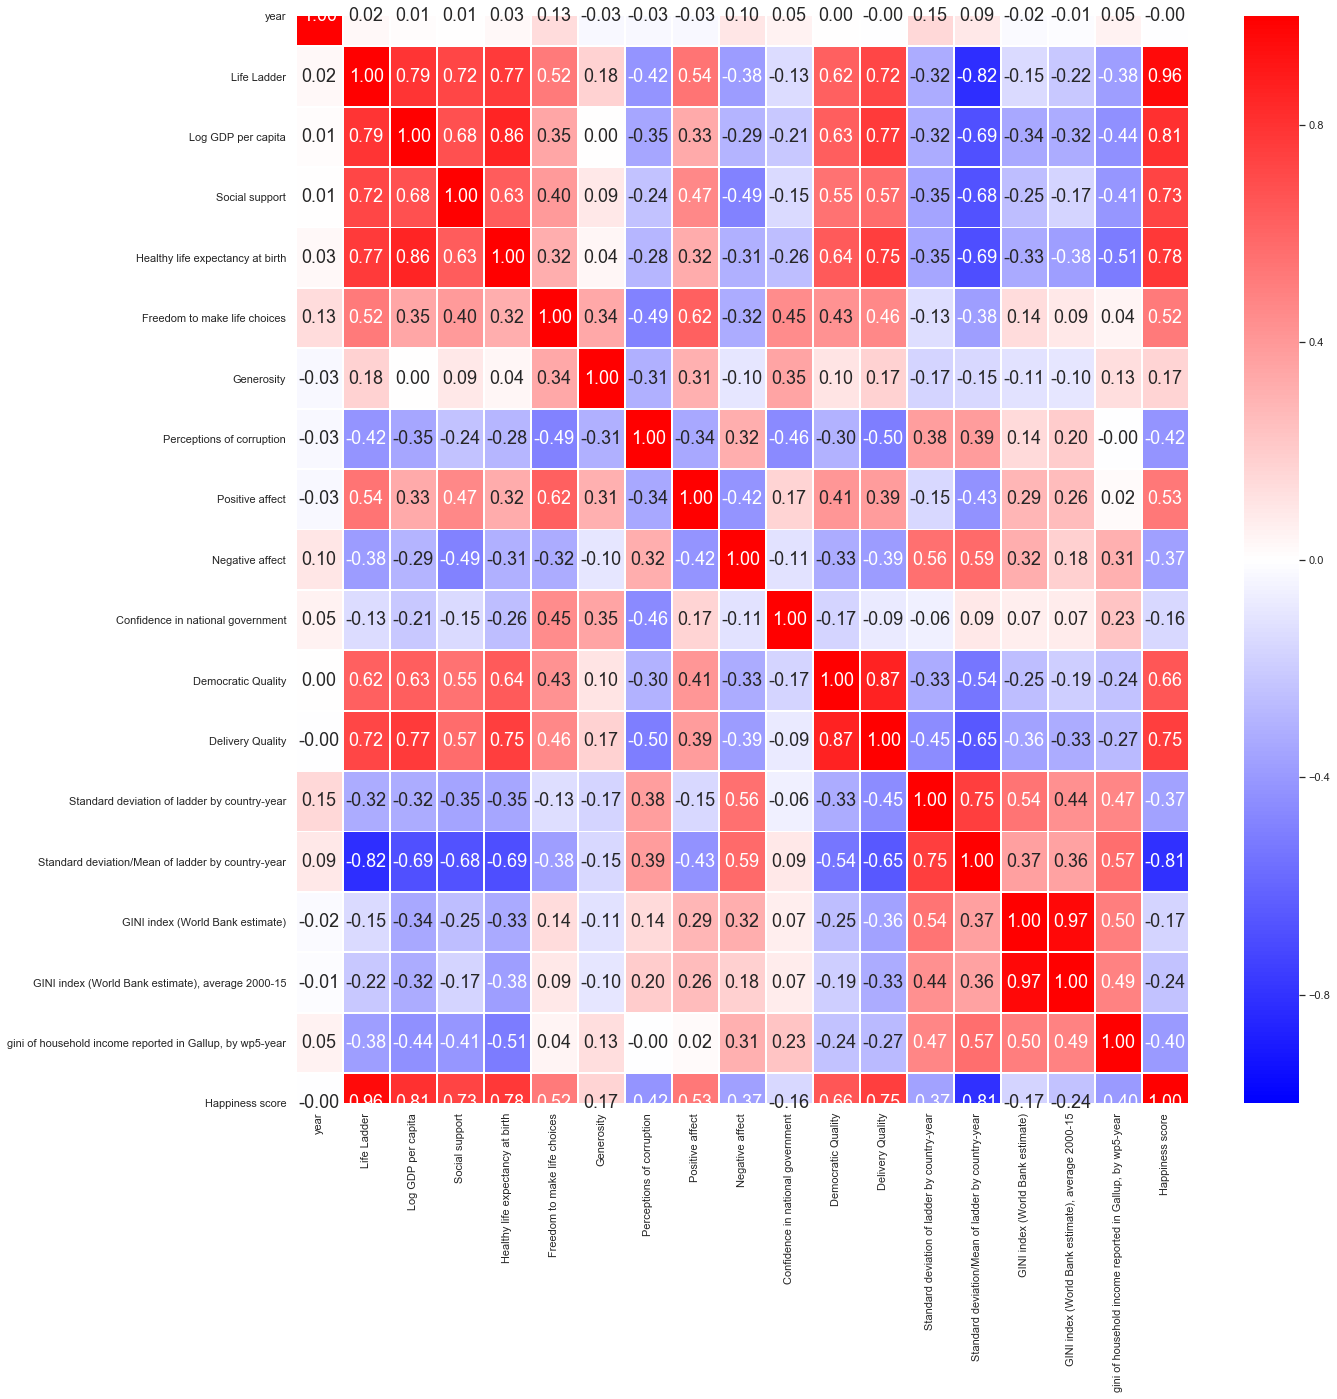

In [11]:
f,axes = plt.subplots(1,1,figsize = (20,20))
happy_corr_fig = sb.heatmap(happy_workdf.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws={"size":18}, cmap = "bwr")
plt.show()
happy_corr_fig.figure.savefig('happy_corr.png')

In [12]:
# Finding highest correlated variables to Happiness Score
happy_corr_df = happy_workdf.corr()
happy_corr_df['Happiness score'].sort_values(ascending = False)

Happiness score                                             1.000000
Life Ladder                                                 0.957836
Log GDP per capita                                          0.811188
Healthy life expectancy at birth                            0.779008
Delivery Quality                                            0.754300
Social support                                              0.733869
Democratic Quality                                          0.657147
Positive affect                                             0.529126
Freedom to make life choices                                0.522207
Generosity                                                  0.169836
year                                                       -0.001135
Confidence in national government                          -0.155942
GINI index (World Bank estimate)                           -0.168755
GINI index (World Bank estimate), average 2000-15          -0.236598
Standard deviation of ladder by co

In [13]:
happy_box_df = happy_workdf.copy()
happy_box_df = happy_box_df.reset_index()
happy_box_df = happy_box_df.drop(columns = ['country', 'year'])
happy_box_df = happy_box_df.dropna()

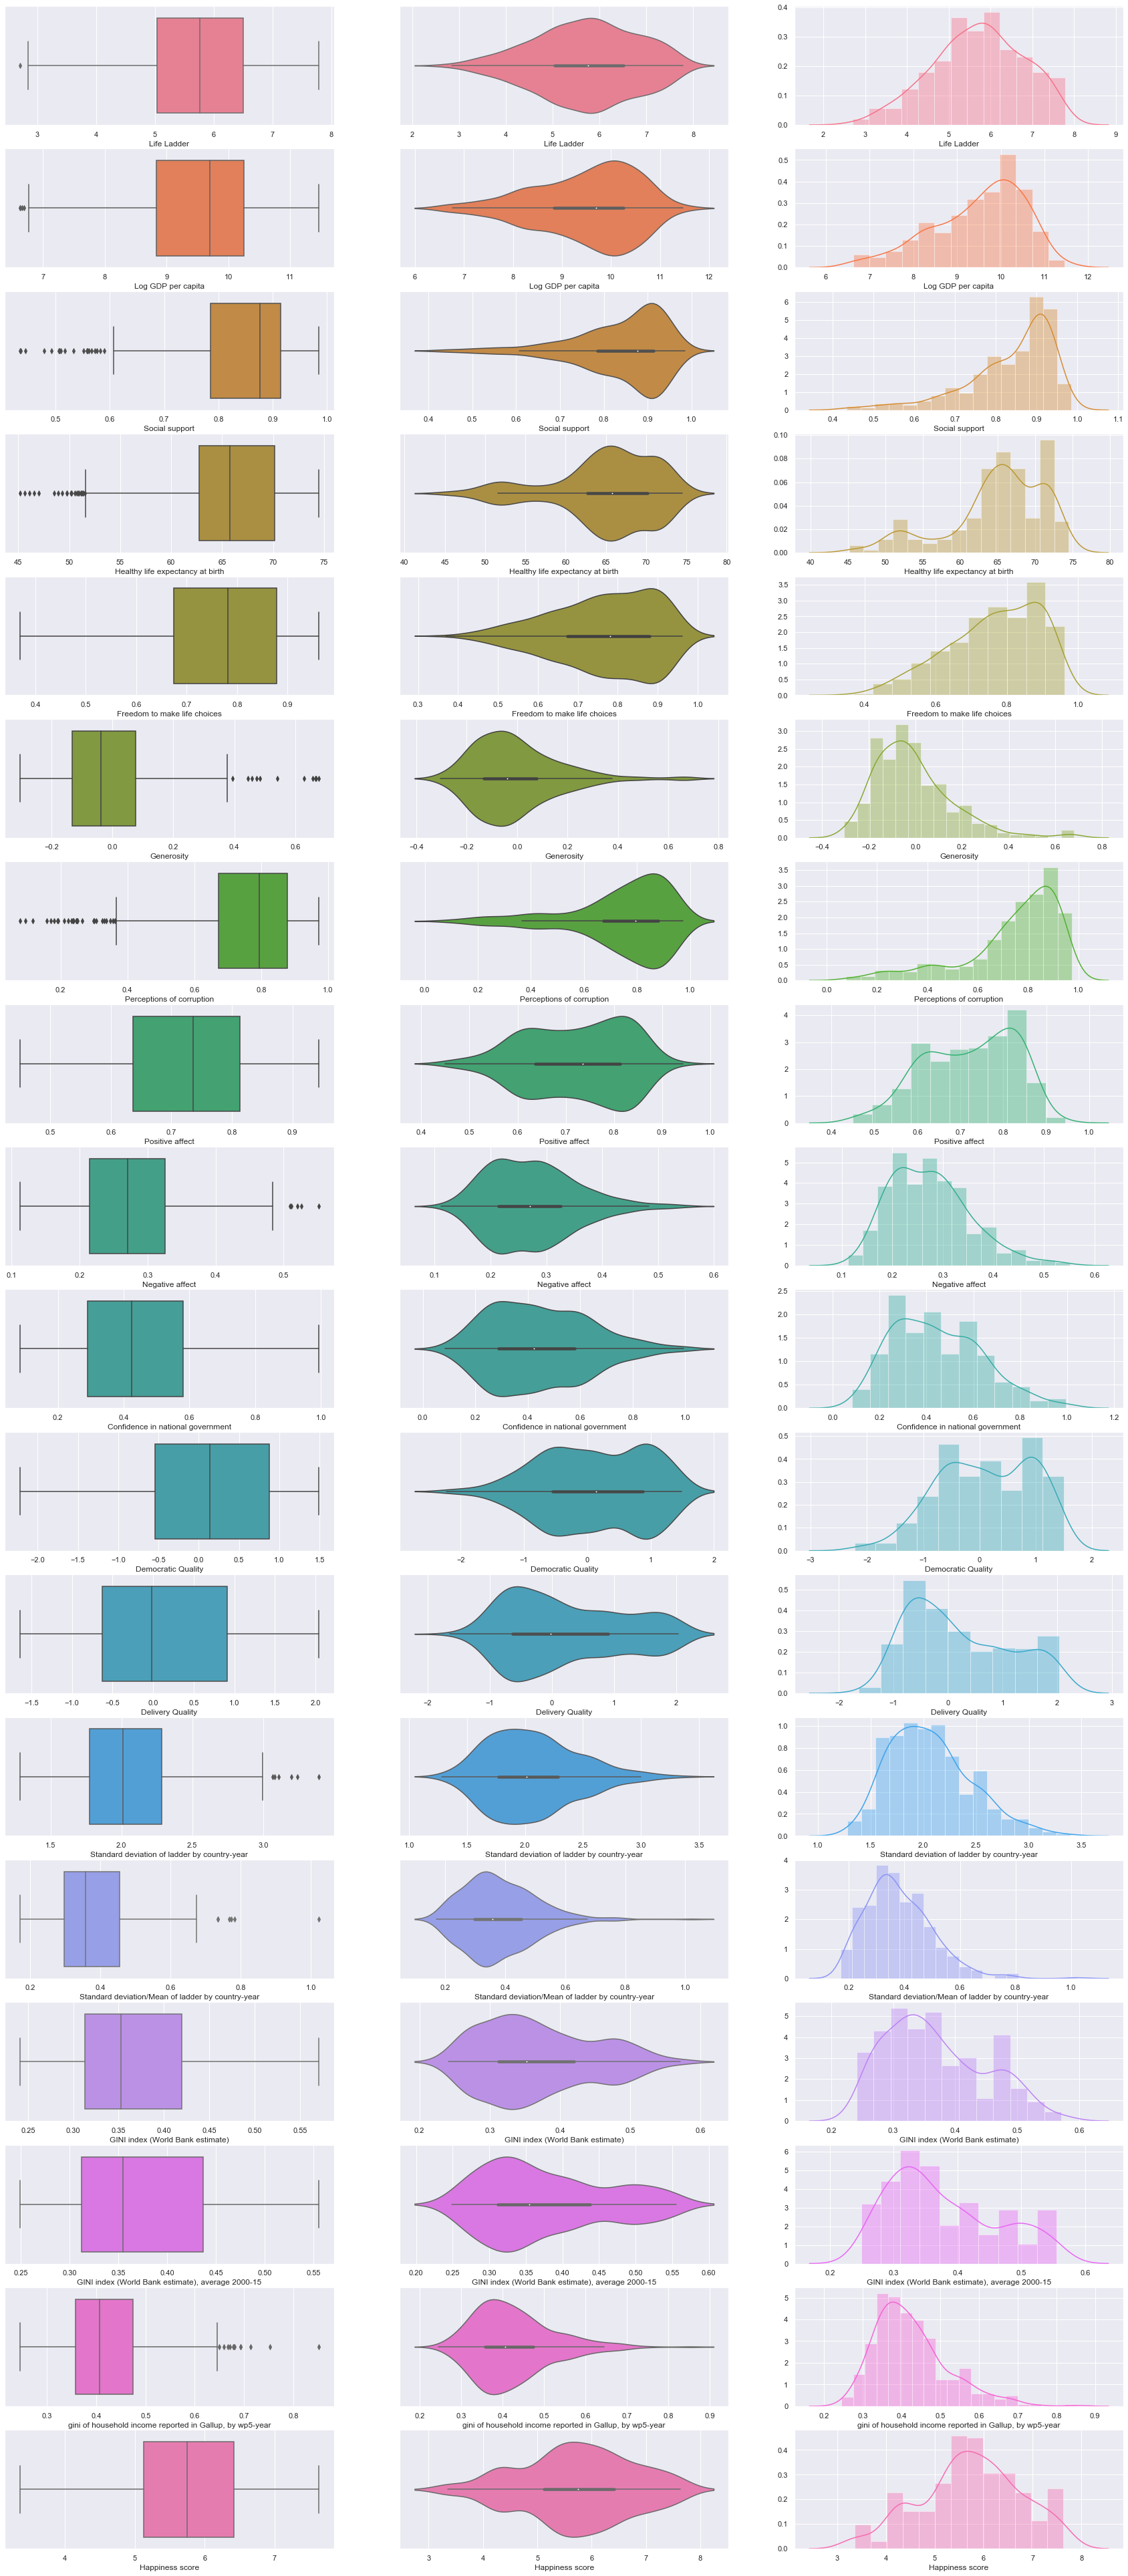

In [14]:
f, axes = plt.subplots(18, 3, figsize = (30,70))
colors = sb.color_palette('husl', 18)
count = 0
for var in happy_box_df:
    sb.boxplot(happy_box_df[var], orient = "h", color = colors[count], ax = axes[count, 0])
    sb.violinplot(happy_box_df[var], orient = 'h', color = colors[count], ax = axes[count, 1])
    sb.distplot(happy_box_df[var], color = colors[count], ax = axes[count, 2])
    count += 1
plt.show()

### Visualisation of Happiness

In [15]:
whrdata = happy_workdf.copy()
whrdata = whrdata.reset_index()

trace1 = go.Choropleth(
            locations = whrdata['country'],
            locationmode='country names',
            z = whrdata['Happiness score'],
            text = whrdata['country'],
            autocolorscale =False,
            reversescale = True,
            colorscale = 'rainbow',
            marker = dict(
                line = dict(
                    color = 'rgb(0,0,0)',
                    width = 0.5)
            ),
            colorbar = dict(
                title = 'Happiness score',
                tickprefix = '')
        )

data = [trace1]
layout = go.Layout(
    title = 'Country Happiness score',
    geo = dict(
        showframe = True,
        showlakes = False,
        showcoastlines = True,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=data, layout=layout )
iplot(fig)

In [16]:
def draw_map(dataset, title, colorscale, reversescale=False):
    trace2 = go.Choropleth(
                locations = whrdata['country'],
                locationmode='country names',
                z = whrdata['Happiness score'],
                text = whrdata['country'],
                autocolorscale =False,
                reversescale = reversescale,
                colorscale = colorscale,
                marker = dict(
                    line = dict(
                        color = 'rgb(0,0,0)',
                        width = 0.5)
                ),
                colorbar = dict(
                    title = 'Happiness Score',
                    tickprefix = '')
            )

    data = [trace2]
    layout = go.Layout(
        title = title,
        geo = dict(
            showframe = True,
            showlakes = False,
            showcoastlines = True,
            projection = dict(
                type = 'orthographic'
            )
        )
    )
    fig = dict( data=data, layout=layout )
    iplot(fig)
    
draw_map(whrdata, 'Country Happiness Score', "Reds")

In [17]:
trace3 = go.Scatter(
    x = whrdata['Log GDP per capita'],
    y = whrdata['Happiness score'],
    name="Happiness Score per year",
    marker=dict(
        color="Blue",
    ),
    mode = "markers"
)
data = [trace3]
layout = dict(title = 'Happiness Score per GDP per capita',
          xaxis = dict(title = 'Log GDP per capita', showticklabels=True), 
          yaxis = dict(title = 'Happiness score'),
          hovermode = 'closest'
         )
fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
happy_scat = happy_workdf.copy()
happy_scat = happy_scat.reset_index()
happy_scat = happy_scat.drop(columns = ['country', 'year'])
happy_scat = happy_scat.dropna()
# happy_scat

sb.pairplot(happy_scat)
# happy_scat_fig.figure.savefig('happy_scat.png')

### Random Forest Tree

In [33]:
# Vary the Number of Clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'

# Compute Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()


In [ ]:
# Setting "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)